# Fake News Detector

## Installing Necessary Libraries

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Loading the data

In [3]:
data_fake=pd.read_csv('Fake.csv')
data_true=pd.read_csv('True.csv')

### Data Preview 

In [4]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
data_true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [6]:
data_fake["class"]=0
data_true['class']=1

In [7]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [8]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis = 0, inplace = True)

    
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis = 0, inplace = True)
    
    

In [9]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [10]:
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

/var/folders/nq/vgkkt08s1379njzw09rpv6gc0000gn/T/ipykernel_12317/1676563180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
/var/folders/nq/vgkkt08s1379njzw09rpv6gc0000gn/T/ipykernel_12317/1676563180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [11]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [12]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [13]:
data_merge=pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


#### "title",  "subject" and "date" columns is not required for detecting the fake news, so I am going to drop the columns.

In [14]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [15]:
data=data_merge.drop(['title','subject','date'], axis = 1)

In [16]:
#count of missing values
data.isnull().sum() 

text     0
class    0
dtype: int64

#### Randomly shuffling the dataframe 

In [17]:
data = data.sample(frac = 1)

In [18]:
data.head()

,text,class
8824,David Duke is perhaps one of the most notoriou...,0
19654,WASHINGTON (Reuters) - U.S. President Donald T...,1
23186,"21st Century Wire says Today, RT International...",0
17338,I heard Mr. McLellan on the radio yesterday an...,0
15976,SEOUL/BEIJING (Reuters) - South Korea will nev...,1


In [19]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [20]:
data.columns

Index(['text', 'class'], dtype='object')

In [21]:
data.head()

,text,class
0,David Duke is perhaps one of the most notoriou...,0
1,WASHINGTON (Reuters) - U.S. President Donald T...,1
2,"21st Century Wire says Today, RT International...",0
3,I heard Mr. McLellan on the radio yesterday an...,0
4,SEOUL/BEIJING (Reuters) - South Korea will nev...,1


## Preprocessing Text

#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [22]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+',b'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [23]:
data['text'] = data['text'].apply(wordopt)

#### Defining dependent and independent variable as x and y

In [24]:
x = data['text']
y = data['class']

## Training the model

#### Splitting the dataset into training set and testing set. 

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

### Extracting Features from the Text

#### Convert text to vectors

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [76]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [77]:
pred_lr = LR.predict(xv_test)

In [78]:
LR.score(xv_test, y_test)

0.9868092691622103

In [79]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5888
           1       0.98      0.99      0.99      5332

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



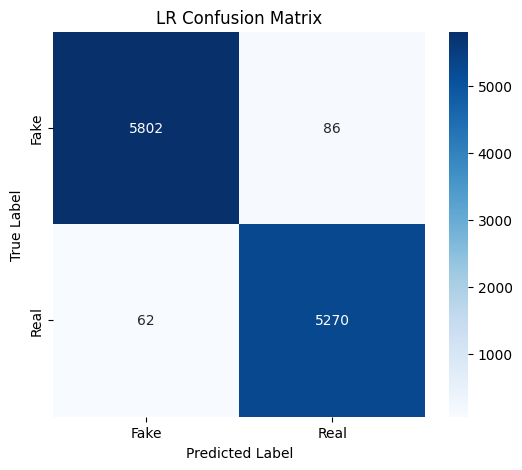

In [88]:

cm = confusion_matrix(y_test, pred_lr)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("LR Confusion Matrix")
plt.show()



## Decision Tree Classifier

In [81]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [82]:
pred_dt = DT.predict(xv_test)

In [83]:
DT.score(xv_test, y_test)

0.9957219251336898

In [84]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5888
           1       0.98      0.99      0.99      5332

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



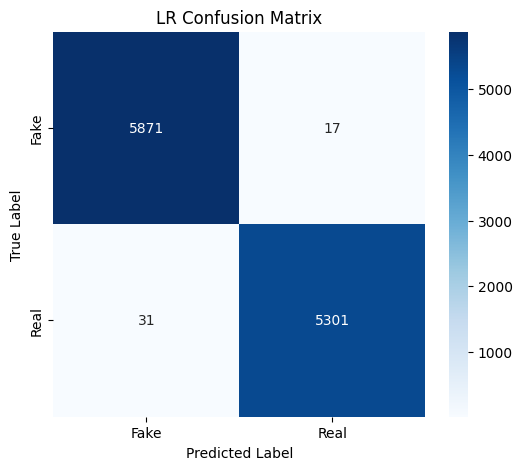

In [89]:

cm = confusion_matrix(y_test, pred_dt)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("LR Confusion Matrix")
plt.show()



## Gradient Boost Classifier

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state = 0)
GB.fit(xv_train, y_train)

KeyboardInterrupt: 

In [ ]:
pred_gb = GB.predict(xv_test)

In [69]:
GB.score(xv_test, y_test)

0.9950089126559715

In [ ]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5888
           1       0.99      1.00      0.99      5332

    accuracy                           1.00     11220
   macro avg       0.99      1.00      0.99     11220
weighted avg       1.00      1.00      1.00     11220



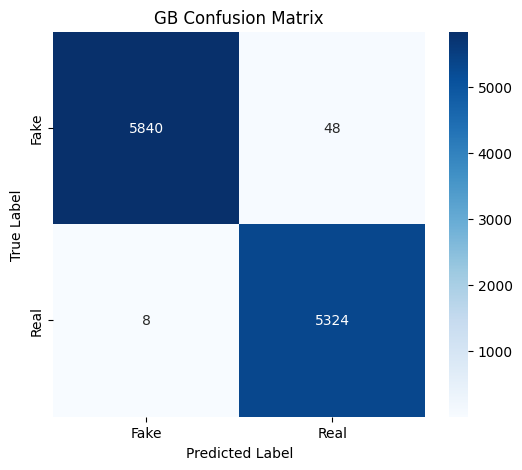

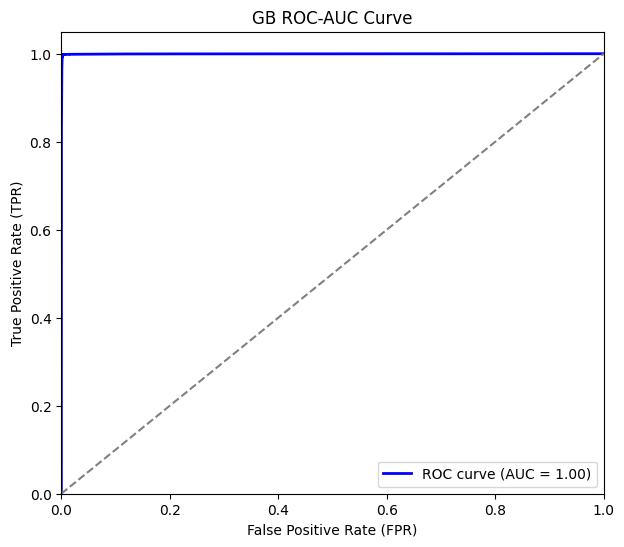

In [ ]:

cm = confusion_matrix(y_test, pred_gb)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("GB Confusion Matrix")
plt.show()



## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rf = RF.predict(xv_test)

In [ ]:
RF.score(xv_test, y_test)

0.99349376114082

In [ ]:
print (classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5888
           1       0.99      0.99      0.99      5332

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [ ]:

cm = confusion_matrix(y_test, pred_rf)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("LR Confusion Matrix")
plt.show()



In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [ ]:
nb = MultinomialNB()
nb.fit(xv_train, y_train)
pred_nb = nb.predict(xv_test)
print("Naïve Bayes Classification Report:\n", classification_report(y_test, pred_nb))


Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      5888
           1       0.94      0.92      0.93      5332

    accuracy                           0.94     11220
   macro avg       0.94      0.93      0.94     11220
weighted avg       0.94      0.94      0.94     11220



In [ ]:
nb.score(xv_test, y_test)

0.935650623885918

In [ ]:

cm = confusion_matrix(y_test, pred_nb)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("NB Confusion Matrix")
plt.show()



In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xv_train, y_train)
pred_knn = knn.predict(xv_test)
print("KNN Classification Report:\n", classification_report(y_test, pred_knn))


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.98      0.77      5888
           1       0.93      0.38      0.54      5332

    accuracy                           0.69     11220
   macro avg       0.78      0.68      0.66     11220
weighted avg       0.78      0.69      0.66     11220



In [ ]:
knn.score(xv_test, y_test)

0.6942959001782532

In [ ]:

cm = confusion_matrix(y_test, pred_knn)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("KNN Confusion Matrix")
plt.show()



In [48]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)
xgb.fit(xv_train, y_train)
pred_xgb = xgb.predict(xv_test)
print("XGBoost Classification Report:\n", classification_report(y_test, pred_xgb))

/Users/saikarthik/tensorflow-test/env/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5888
           1       1.00      1.00      1.00      5332

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [51]:
xgb.score(xv_test, y_test)

0.9975044563279858

In [ ]:

cm = confusion_matrix(y_test, pred_xgb)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("XGB Confusion Matrix")
plt.show()

